In [288]:
import wrangle_superstore
from scipy import stats
import pandas as pd
import numpy as np
import os
from datetime import date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [11]:
df = wrangle_superstore.wrangle_superstore(use_cache=False)

In [13]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,9.34,...,0.2,1.17,Office Supplies,Art,Newell 312,Central,5.84,0.5840,Newell,Newell_Art


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1734 non-null   object        
 1   order_date    1734 non-null   datetime64[ns]
 2   ship_date     1734 non-null   datetime64[ns]
 3   ship_mode     1734 non-null   object        
 4   customer_id   1734 non-null   object        
 5   segment       1734 non-null   object        
 6   city          1734 non-null   object        
 7   state         1734 non-null   object        
 8   postal_code   1734 non-null   object        
 9   sales         1734 non-null   float64       
 10  quantity      1734 non-null   float64       
 11  discount      1734 non-null   float64       
 12  profit        1734 non-null   float64       
 13  category      1734 non-null   object        
 14  sub_category  1734 non-null   object        
 15  product_name  1734 n

# Which product line should we expand?

In [4]:
#sort by brand
df.brand.value_counts().sort_index(ascending=False)
# remove all brands with less than 100 sales
df.sub_category.value_counts()[df.sub_category.value_counts() > 10]

Binders        263
Paper          224
Furnishings    168
Storage        162
Phones         157
Art            149
Accessories    131
Chairs          95
Appliances      71
Labels          67
Tables          62
Envelopes       48
Fasteners       43
Bookcases       35
Supplies        28
Machines        21
Name: sub_category, dtype: int64

## Top product lines by profit over time
redefine product line as sub category due to lack of data on product line defined as brand and sub category

In [5]:
#make a list of sub_categories
sub_categories = df.sub_category.unique()
sub_categories

array(['Labels', 'Binders', 'Storage', 'Accessories', 'Art',
       'Furnishings', 'Envelopes', 'Phones', 'Chairs', 'Fasteners',
       'Paper', 'Appliances', 'Supplies', 'Tables', 'Bookcases',
       'Copiers', 'Machines'], dtype=object)

In [6]:
# show total profit for each sub_category
df.groupby('sub_category').sum()['profit'].sort_values(ascending=False)

sub_category
Accessories    7786.37
Phones         6547.30
Copiers        5598.39
Paper          5464.41
Chairs         4306.38
Binders        4062.58
Appliances     2776.50
Storage        2771.72
Furnishings    2124.42
Labels         1544.50
Envelopes      1394.52
Art            1336.42
Fasteners       215.62
Supplies       -253.98
Machines       -680.68
Bookcases     -2267.77
Tables        -4786.18
Name: profit, dtype: float64

In [7]:
years = df.order_date.dt.year.unique()

In [35]:
sub_category_profit = pd.DataFrame()
# Add columns for each year to show total profit for each sub_category  
for year in years:
    sub_category_profit[str(year)] = df[df.order_date.dt.year == year].groupby(['sub_category']).sum()['profit']
sub_category_profit    


,2014,2015,2016,2017
sub_category,,,,
Accessories,1498.88,2498.84,1505.88,2282.77
Appliances,377.81,808.73,318.17,1271.79
Art,334.35,232.01,353.23,416.83
Binders,1071.51,3361.78,-685.47,314.76
Bookcases,136.04,-2693.42,107.43,182.18
Chairs,1142.42,1013.59,1054.12,1096.25
Copiers,1311.98,2026.45,444.99,1814.97
Envelopes,103.03,438.99,719.62,132.88
Fasteners,63.91,20.05,74.97,56.69


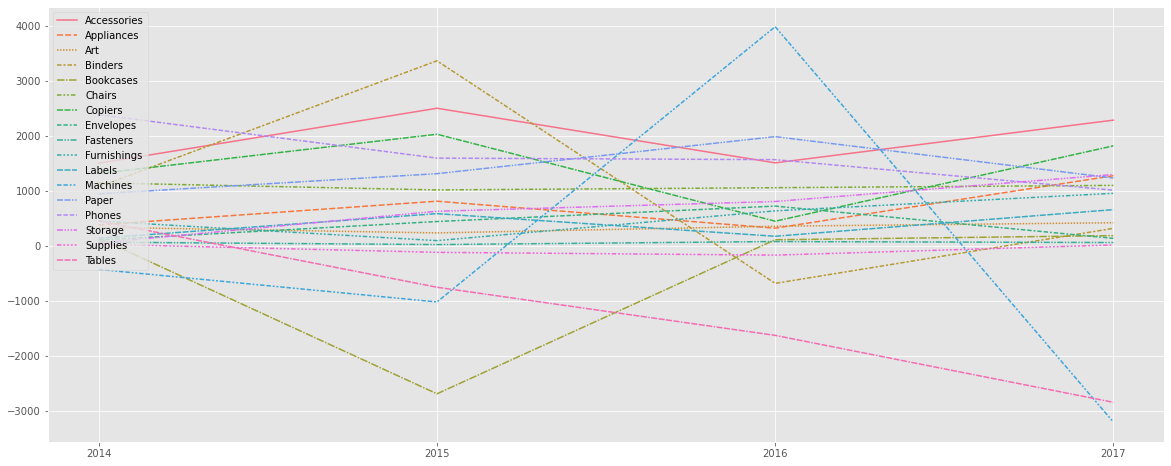

In [34]:
#change figure size
plt.figure(figsize=(20,8))
#use seaborn to make a line plot
sns.lineplot(data=sub_category_profit.T)
#move legend to upper left
plt.legend(loc='upper left')

In [40]:
# df where sub_category is 'paper'


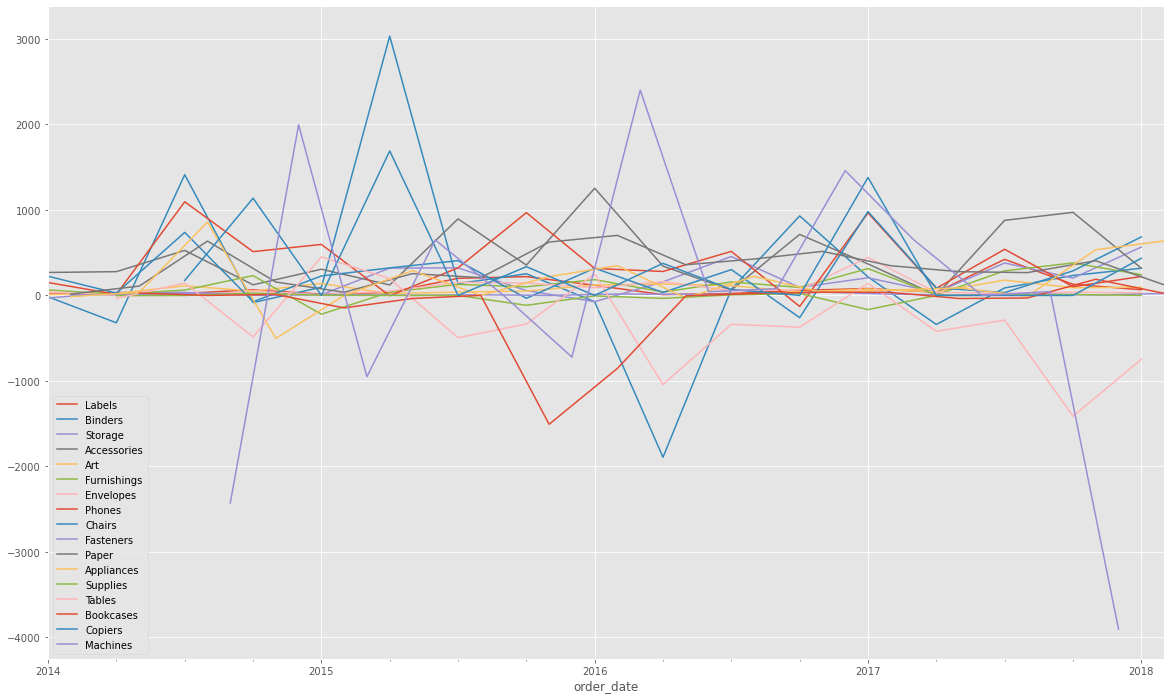

In [281]:
for sub_category in sub_categories: 
    plt = df[df.sub_category==sub_category].resample('3M').sum()['profit'].plot(label=sub_category, figsize=(20,12))
plt.legend(loc='lower left')



In [103]:
# which 3 sub_category have the highest profit?
top = df.groupby('sub_category').sum()['profit'].sort_values(ascending=False).head(3).index.tolist()
bottom = df.groupby('sub_category').sum()['profit'].sort_values(ascending=False).tail(3).index.tolist()
sub_categories2 = top + ['Paper'] + bottom

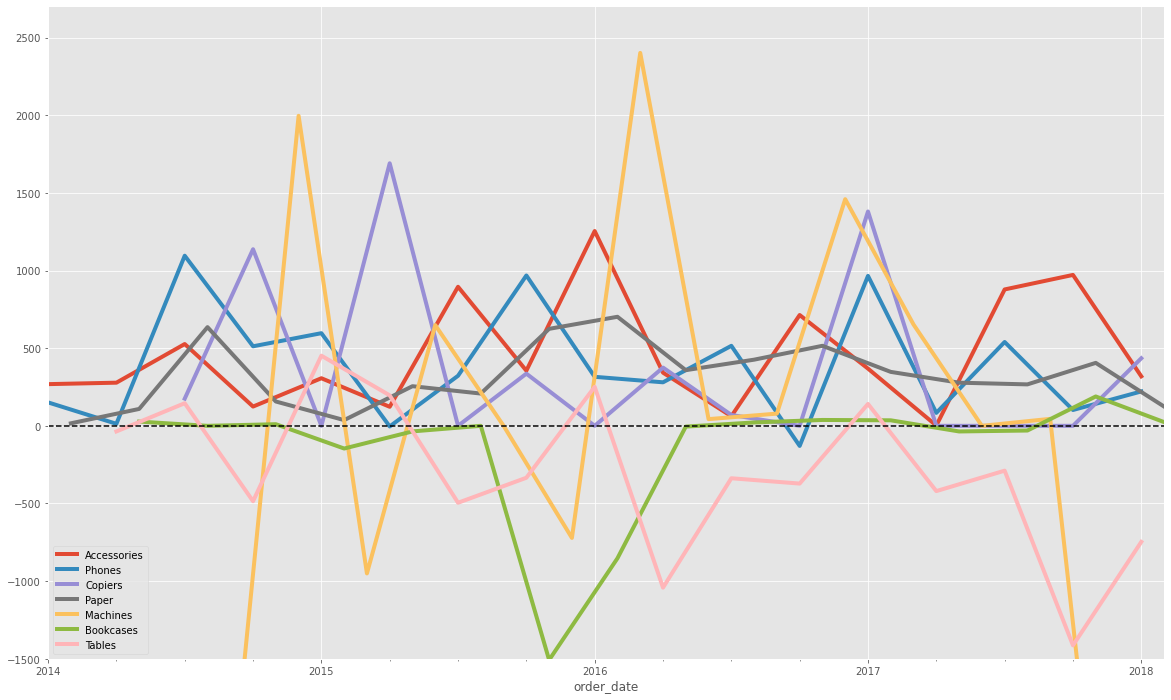

In [286]:
for sub_category in sub_categories2: 
    plt = df[df.sub_category==sub_category].resample('3M').sum()['profit'].plot(label=sub_category, 
    figsize=(20,12), 
    linewidth=4, 
    ylim=(-1500,2700))
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(loc='lower left')


In [141]:
df[df.sub_category=='Accessories']['profit'].values.size


131

In [140]:
df[df.sub_category=='Accessories'].index.size

131

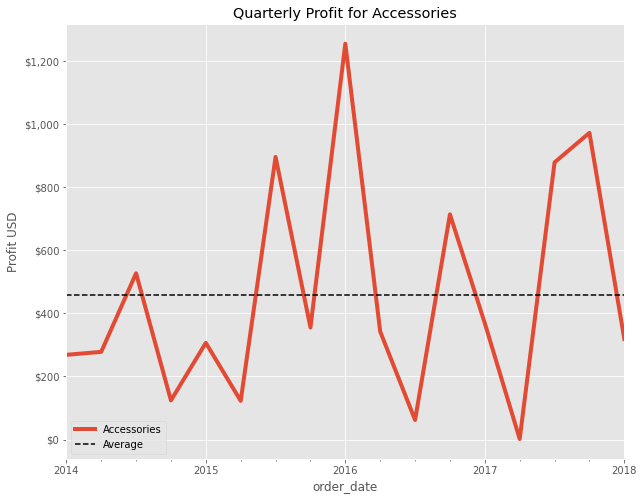

In [216]:
# plot quarterly profit for accessories
plt = df[df.sub_category=='Accessories'].resample('3M').sum()['profit'].plot(label='Accessories', figsize=(10,8), linewidth=4) 
# plot the average profit for accessories
plt.axhline(y=df[df.sub_category=='Accessories'].resample('3M').sum()['profit'].mean(), color='black', linestyle='--', label='Average')
plt.legend(loc='lower left')
#change title
plt.set_title('Quarterly Profit for Accessories')
#change y axis label
plt.set_ylabel('Profit USD')
#change x axis label
plt.yaxis.set_major_formatter('${x:,.0f}')


## top product lines with increasing profit over time

In [165]:
# format to date to string
x = df[df.sub_category=='Accessories'].index
x = x.strftime('%M/%d/%Y')
x

Index(['00/09/2014', '00/13/2014', '00/01/2014', '00/07/2014', '00/06/2014',
       '00/09/2014', '00/09/2014', '00/11/2014', '00/27/2014', '00/09/2014',
       ...
       '00/18/2017', '00/23/2017', '00/26/2017', '00/27/2017', '00/01/2017',
       '00/05/2017', '00/08/2017', '00/10/2017', '00/11/2017', '00/18/2017'],
      dtype='object', name='order_date', length=131)

## top profit per unit


In [174]:
df[df.sub_category=='Accessories'].index.unique()

DatetimeIndex(['2014-01-09', '2014-01-13', '2014-02-01', '2014-02-07',
               '2014-04-06', '2014-05-09', '2014-05-11', '2014-05-27',
               '2014-06-09', '2014-06-22',
               ...
               '2017-11-18', '2017-11-23', '2017-11-26', '2017-11-27',
               '2017-12-01', '2017-12-05', '2017-12-08', '2017-12-10',
               '2017-12-11', '2017-12-18'],
              dtype='datetime64[ns]', name='order_date', length=118, freq=None)

In [270]:
# make a column with ordinal dates
df['date'] = df.index.strftime('%M/%d/%Y')  
df['date_ordinal']=df['order_date'].apply(lambda date: date.toordinal())
df[['date_ordinal', 'date']]

,date_ordinal,date
order_date,,
2014-01-04,735237,00/04/2014
2014-01-04,735237,00/04/2014
2014-01-04,735237,00/04/2014
2014-01-09,735242,00/09/2014
2014-01-09,735242,00/09/2014
...,...,...
2017-12-30,736693,00/30/2017
2017-12-30,736693,00/30/2017
2017-12-30,736693,00/30/2017


In [254]:
sub_category="Accessories"
df[df.sub_category==sub_category].resample('3M').sum()



,sales,quantity,discount,profit,unit_cost,unit_profit,date_ordinal
order_date,,,,,,,
2014-01-31,677.94,9.0,0.2,268.45,120.79,46.3660,1470488
2014-04-30,701.04,15.0,0.2,277.82,167.62,52.4209,2205865
2014-07-31,2797.53,41.0,1.0,526.64,750.08,173.3068,7353996
2014-10-31,741.70,31.0,0.6,124.06,216.98,30.2752,6619384
2015-01-31,1404.87,29.0,0.6,306.39,385.36,76.9696,5884580
2015-04-30,440.54,10.0,0.4,122.63,280.60,62.1061,3678333
2015-07-31,2817.45,20.0,0.2,895.35,460.88,134.4776,2943128
2015-10-31,1998.53,33.0,1.2,354.97,564.81,83.0919,6622779
2016-01-31,4271.21,62.0,1.4,1254.02,1202.09,356.4622,12510995


In [276]:
temp_df = df[df.sub_category==sub_category].resample('3M').sum()
temp_df['date'] = temp_df.index
temp_df['ordinal']=temp_df['date'].apply(lambda date: date.toordinal())    
temp_df

,sales,quantity,discount,profit,unit_cost,unit_profit,date_ordinal,date,ordinal
order_date,,,,,,,,,
2014-01-31,44.74,7.0,0.4,15.78,20.33,6.1653,2205729,2014-01-31,735264
2014-04-30,48.50,8.0,0.0,23.87,17.95,8.9120,1470651,2014-04-30,735353
2014-07-31,50.58,14.0,0.0,24.28,13.27,6.3253,2206200,2014-07-31,735445
2014-10-31,138.33,15.0,0.4,64.60,28.96,12.1640,2941969,2014-10-31,735537
2015-01-31,40.28,8.0,0.4,16.07,20.84,6.6803,2206760,2015-01-31,735629
2015-04-30,75.18,6.0,0.0,35.33,12.53,5.8891,735706,2015-04-30,735718
2015-07-31,453.04,16.0,0.4,200.03,146.25,61.7503,2942992,2015-07-31,735810
2015-10-31,475.65,20.0,0.0,219.76,47.71,22.2902,2943379,2015-10-31,735902
2016-01-31,242.35,17.0,0.0,118.24,107.08,52.3293,2943797,2016-01-31,735994


/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


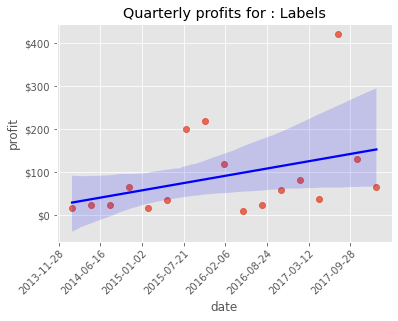

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


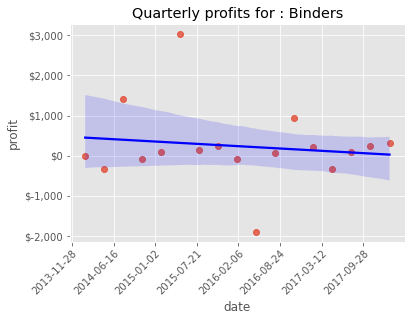

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


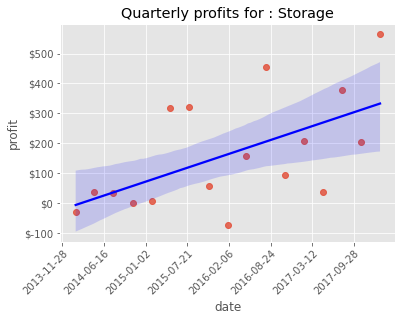

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


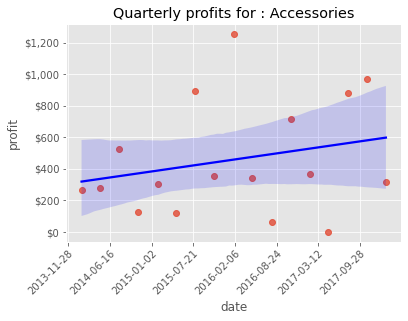

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


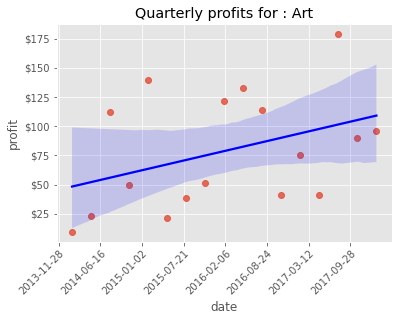

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


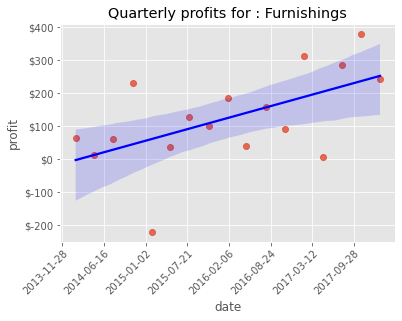

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


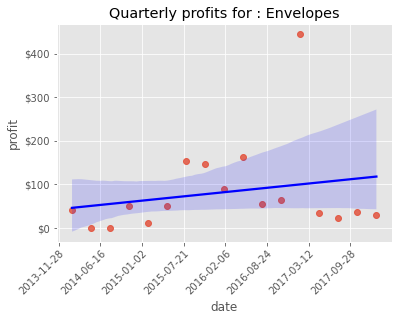

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


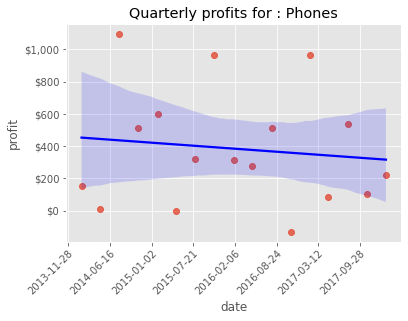

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


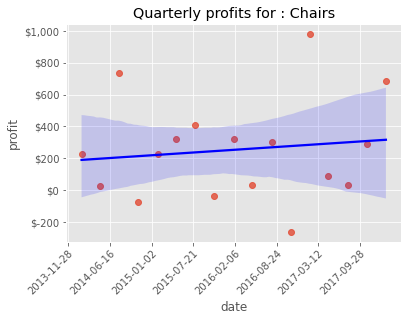

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


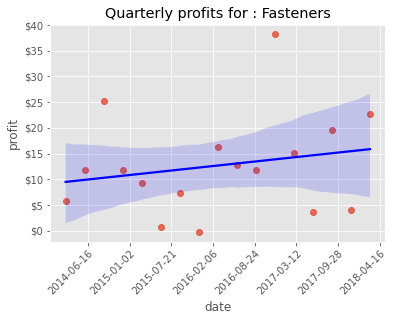

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


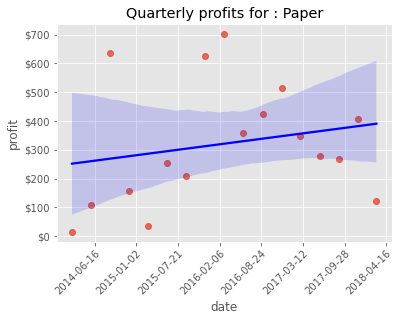

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


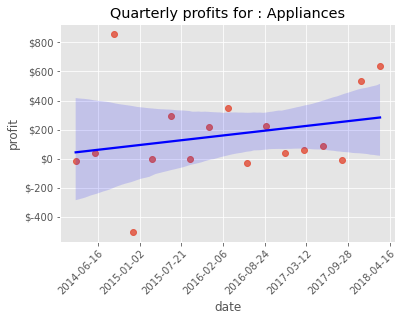

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


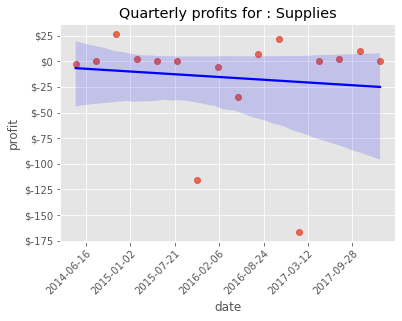

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


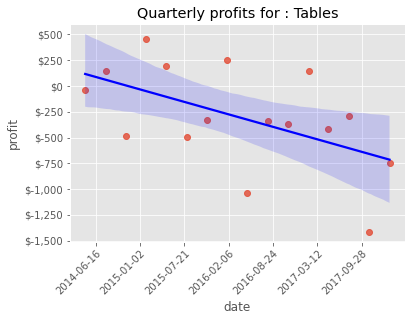

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


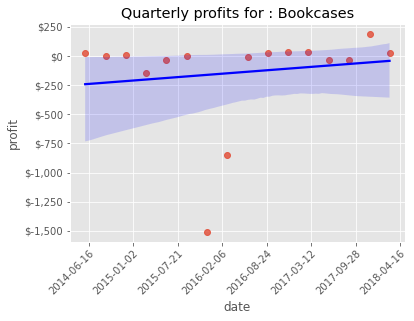

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


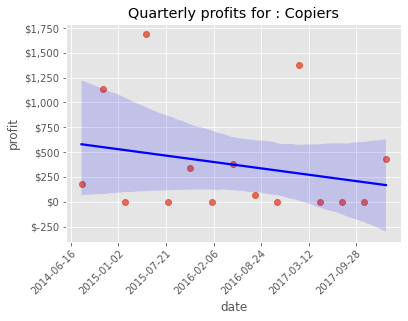

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/3479406475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


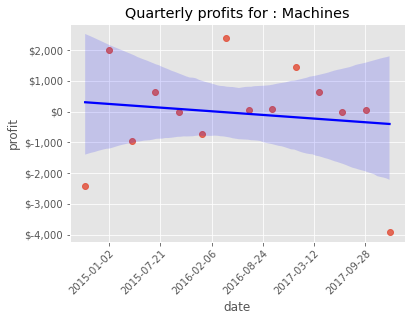

In [289]:
for sub_category in sub_categories: 
    temp_df = df[df.sub_category==sub_category].resample('3M').sum()
    temp_df['date'] = temp_df.index
    temp_df['ordinal']=temp_df['date'].apply(lambda date: date.toordinal())    
    ax = sns.regplot(
        data=temp_df,
        x='ordinal',
        y='profit',
        line_kws={'color':'blue'},
    )
    ax.set_xlabel('date')
    new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
    ax.set_xticklabels(new_labels)
    # rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.set_title(f'Quarterly profits for : {sub_category}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    plt.show()

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


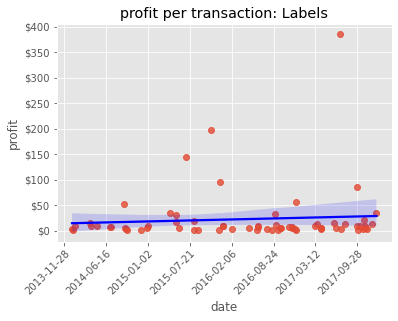

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


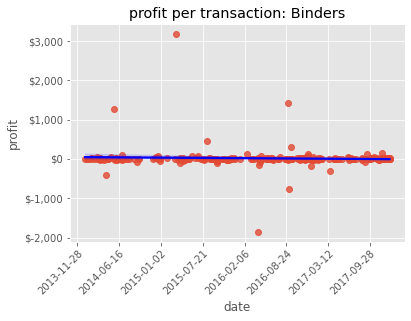

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


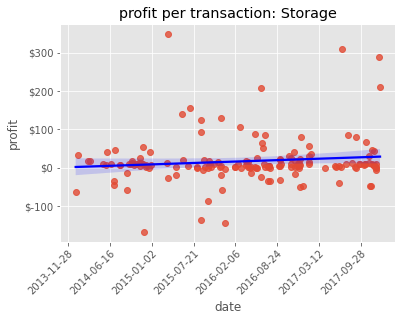

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


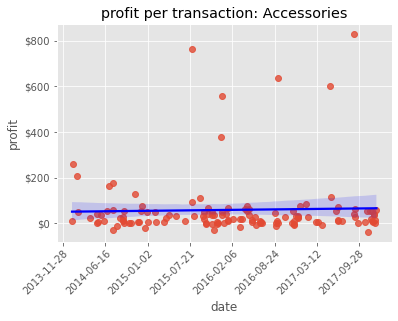

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


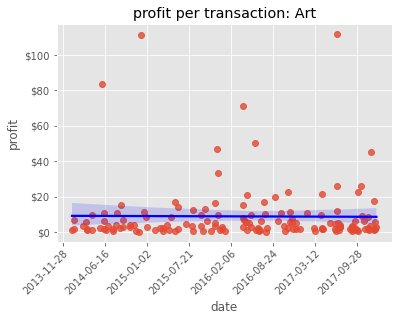

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


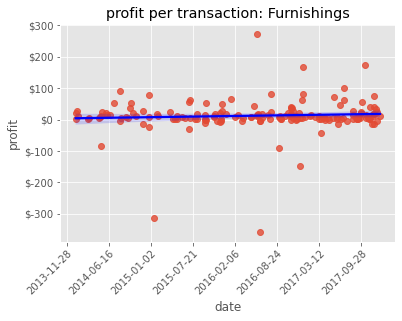

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


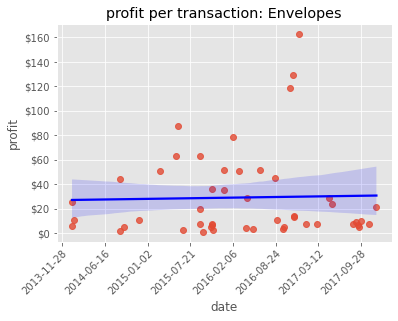

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


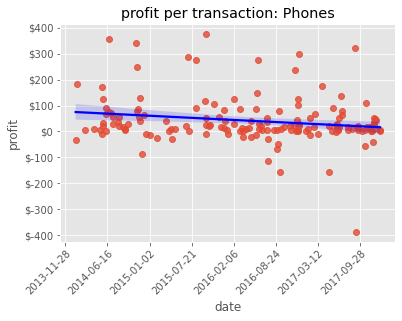

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


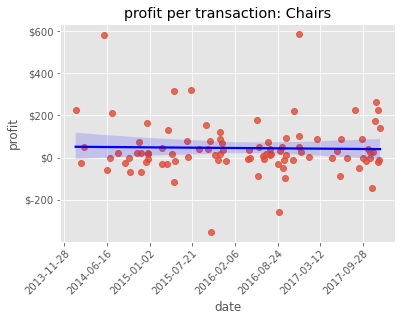

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


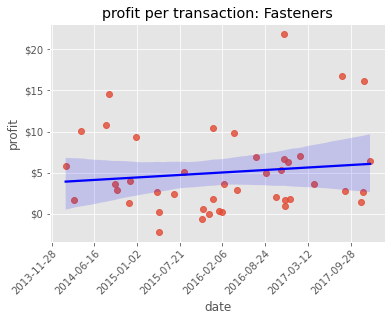

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


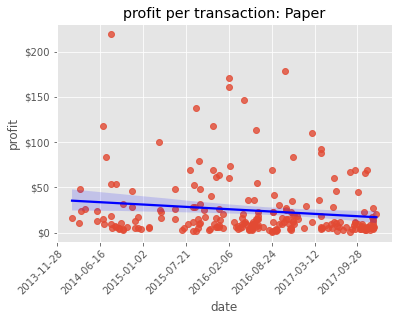

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


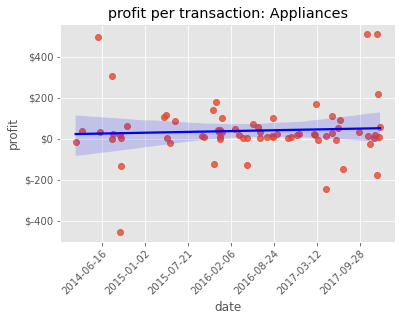

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


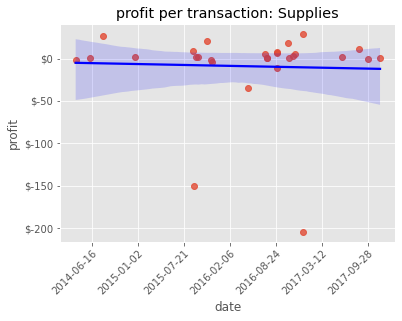

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


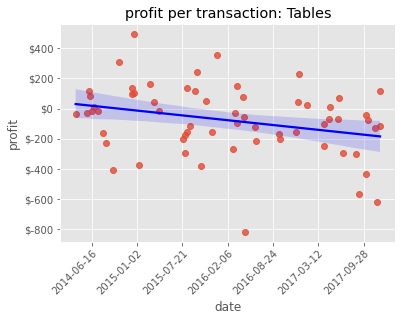

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


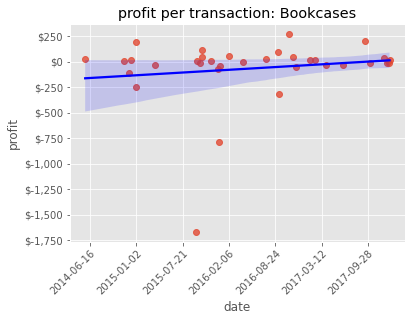

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


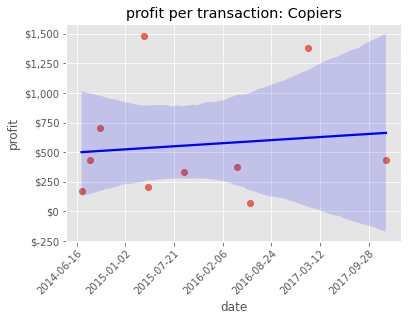

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_40240/1682872538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


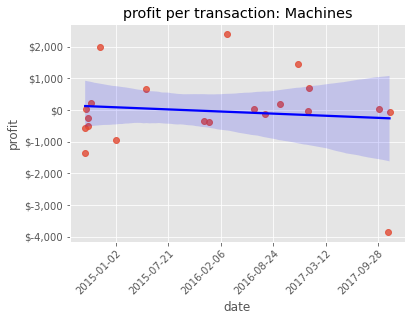

In [279]:
for sub_category in sub_categories: 
    ax = sns.regplot(
        data=df[df.sub_category==sub_category],
        x='date_ordinal',
        y='profit',
        line_kws={'color':'blue'},
    )
    ax.set_xlabel('date')
    new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
    ax.set_xticklabels(new_labels)
    # rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.set_title(f'profit per transaction: {sub_category}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    plt.show()